<h1 align="center">
  <span>Project</span>
  <span>Name</span>
  <span>-</span>
  <span>Vehicle</span>
  <span>Price</span>
  <span>Prediction</span>
  <span>.</span>
</h1>

<style>
    h1 {
        text-align: center;
        color: white;
        padding: 50px;
        border-radius: 12px;
        display: inline-block;
        background: linear-gradient(90deg, rgba(25, 0, 25, 1), rgba(43, 18, 76, 1), rgba(104, 43, 91, 1), rgba(133, 79, 108, 1), rgba(223, 182, 178, 1));
        background-size: 200% 200%;
        transition: background-position 0.6s ease, transform 0.4s ease;
        cursor: pointer;
    }

    h1 span {
        opacity: 0.3;
        display: inline-block;
        transform: translateY(20px);
        transition: opacity 0.4s ease, transform 0.4s ease;
    }

    h1:hover {
        background-position: 100% 0;
        transform: scale(1.05);
    }

    /* Staggered reveal effect */
    h1:hover span {
        opacity: 1;
        transform: translateY(0);
    }

    h1:hover span:nth-child(1) { transition-delay: 0s; }
    h1:hover span:nth-child(2) { transition-delay: 0.2s; }
    h1:hover span:nth-child(3) { transition-delay: 0.4s; }
    h1:hover span:nth-child(4) { transition-delay: 0.6s; }
    h1:hover span:nth-child(5) { transition-delay: 0.8s; }
    h1:hover span:nth-child(6) { transition-delay: 1.0s; }
    h1:hover span:nth-child(7) { transition-delay: 1.2s; }
</style>



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member Name -**   - Kushang Shah

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [823]:
# Import Libraries
# For handling data and doing some calculations
import pandas as pd  # used for working with data in tables
import numpy as np   # helps with numbers and arrays

# For visualizing data (making graphs and charts)
import matplotlib.pyplot as plt  # used to make plots
import seaborn as sns            # makes nice-looking graphs

import random

# For some basic statistics and tests
import scipy.stats as stats
from scipy.stats import chi2_contingency  # used for checking relationships between categorical variables

# For preparing the data before training models
from sklearn.model_selection import train_test_split  # to split data into training and testing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # to scale and label data
from imblearn.over_sampling import SMOTE  # helps to deal with imbalanced data

# Machine learning models (the actual algorithms)
from sklearn.linear_model import LogisticRegression  # good for binary classification
from sklearn.tree import DecisionTreeClassifier  # simple tree-based model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # more advanced tree-based models


import time  # to measure how long things take

# For checking how well the models are doing
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    precision_score,
    recall_score,
    f1_score
)

# For tuning the models to get better performance
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_score,
    learning_curve
)

# To ignore any warnings that pop up
import warnings
warnings.filterwarnings("ignore")

# To save the file
import pickle


### Dataset Loading

In [824]:
# Load Dataset
vehiclePrice_df = pd.read_csv('dataset.csv')
df = vehiclePrice_df.copy()


### Dataset First View

In [825]:
# Dataset First Look
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [826]:
df.tail()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive
1001,2024 Chevrolet Silverado 2500 WT,01u 2024 Chevrolet Silverado 2500HD Work Truck...,Chevrolet,Silverado 2500,2024,48995.0,"8 gasoline direct injection, variable valve co...",8.0,Gasoline,31.0,Automatic,WT,Pickup Truck,4.0,Wheatland Yellow,Jet Black,Rear-wheel Drive


In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

### Dataset Rows & Columns count

In [828]:
# Dataset Rows & Columns count
df.shape

(1002, 17)

### Dataset Information

In [829]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [830]:
round(df.describe(), 2) #. Numerical columns summary statistics

,year,price,cylinders,mileage,doors
count,1002.00,979.00,897.00,968.00,995.00
mean,2023.92,50202.99,4.98,69.03,3.94
std,0.30,18700.39,1.39,507.44,0.27
min,2023.00,0.00,0.00,0.00,2.00
25%,2024.00,36600.00,4.00,4.00,4.00
50%,2024.00,47165.00,4.00,8.00,4.00
75%,2024.00,58919.50,6.00,13.00,4.00
max,2025.00,195895.00,8.00,9711.00,5.00


#### Duplicate Values

In [831]:
# Dataset Duplicate Value Count
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 24


#### Missing Values/Null Values

In [832]:
# Missing Values/Null Values Count
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64


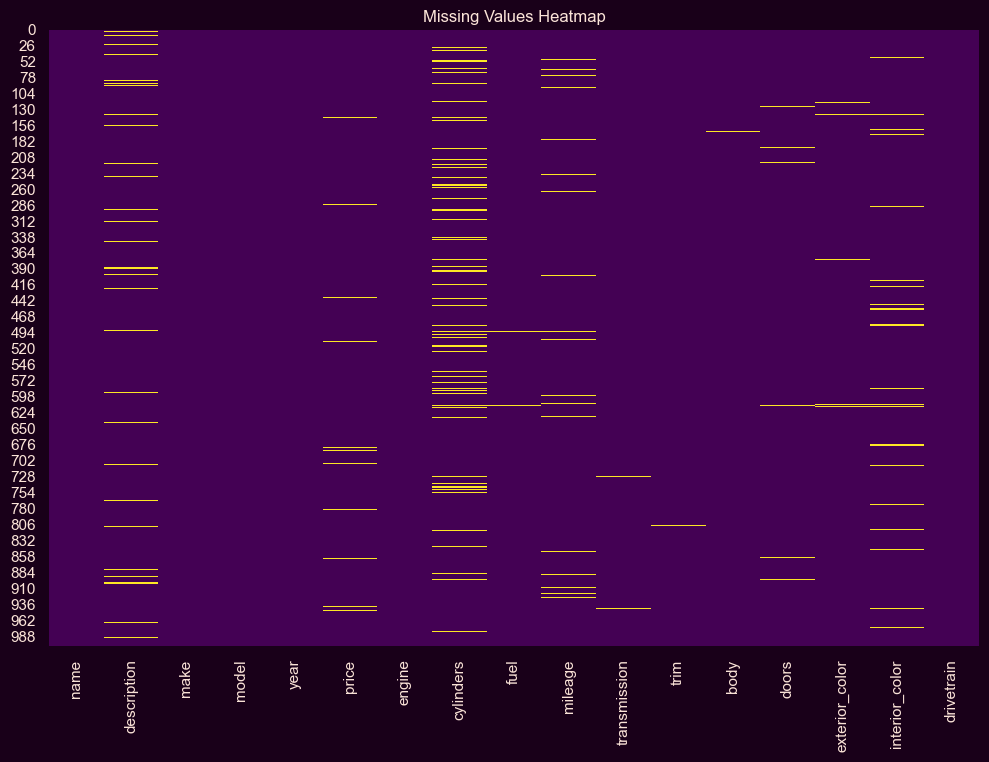

In [833]:
# Visualizing the missing values
plt.style.use('dark_background')  # This sets black background + white text by default
sns.set_theme(style="darkgrid", rc={
    'axes.facecolor': "#2B124C",      # plot area background
    'figure.facecolor': "#190019",    # whole figure background
    'axes.labelcolor': "#FBE4D8",
    'xtick.color': "#FBE4D8",
    'ytick.color': '#FBE4D8',
    'text.color': "#FBE4D8",
    'axes.edgecolor': '#FBE4D8',
    'grid.color': '#854F6C'
})

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [834]:
# Dataset Columns

In [835]:
# Dataset Describe

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [836]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [837]:
# Write your code to make your dataset analysis ready.
df.drop_duplicates(inplace=True)

df['cylinders'].fillna(df['cylinders'].median(), inplace=True) # Median for numerical data with potential outliers

df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)         # Mode for categorical data

df['mileage'].fillna(df['mileage'].mean(), inplace=True)       # Mean for numerical data

df['transmission'].fillna(df['transmission'].mode()[0], inplace=True) # Mode for categorical data

df['trim'].fillna(df['trim'].mode()[0], inplace=True)           # Mode for categorical data

df['body'].fillna(df['body'].mode()[0], inplace=True)           # Mode for categorical data

df['doors'].fillna(df['doors'].mode()[0], inplace=True)         # Mode for categorical data

df['exterior_color'].fillna(df['exterior_color'].mode()[0], inplace=True) # Mode for categorical data

df['interior_color'].fillna(df['interior_color'].mode()[0], inplace=True) # Mode for categorical data

df['price'].fillna(df['price'].median(), inplace=True) # Median for price due to potential skewness

df['description'].fillna('No description available', inplace=True) # Placeholder for text

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
name              0
description       0
make              0
model             0
year              0
price             0
engine            2
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64


Address the remaining missing values in the 'engine' column and then identify and handle outliers in the numerical columns ('price', 'cylinders', 'mileage', 'doors', 'year') using the IQR method.

In [838]:
# Address remaining missing values in 'engine'
df['engine'].fillna(df['engine'].mode()[0], inplace=True)

In [839]:
df.isna().sum()

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [840]:
# Making a copy of the original DataFrame for comparison
df_before = df.copy()

In [841]:
# Identify and handle outliers in numerical columns using IQR
numerical_cols = ['price', 'cylinders', 'mileage', 'doors', 'year']

for col in numerical_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values outside the bounds to the boundary values
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

<Figure size 1500x1500 with 0 Axes>

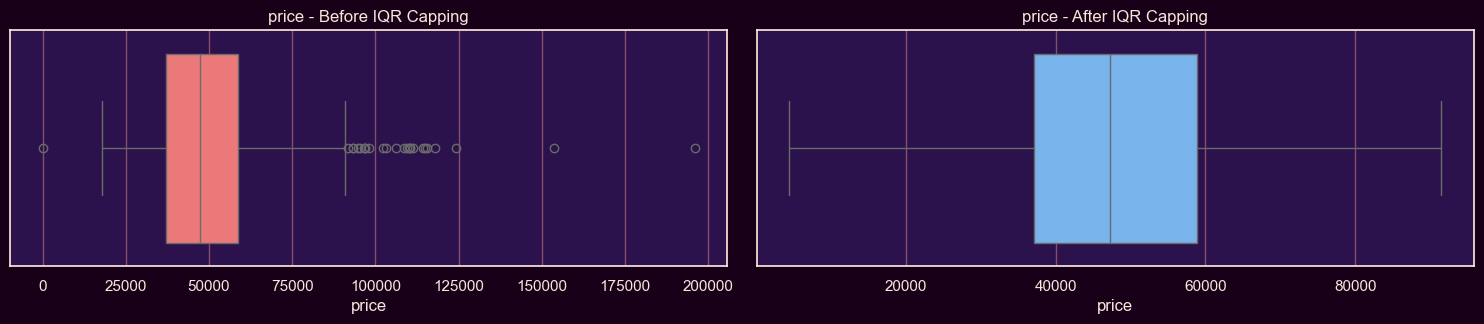

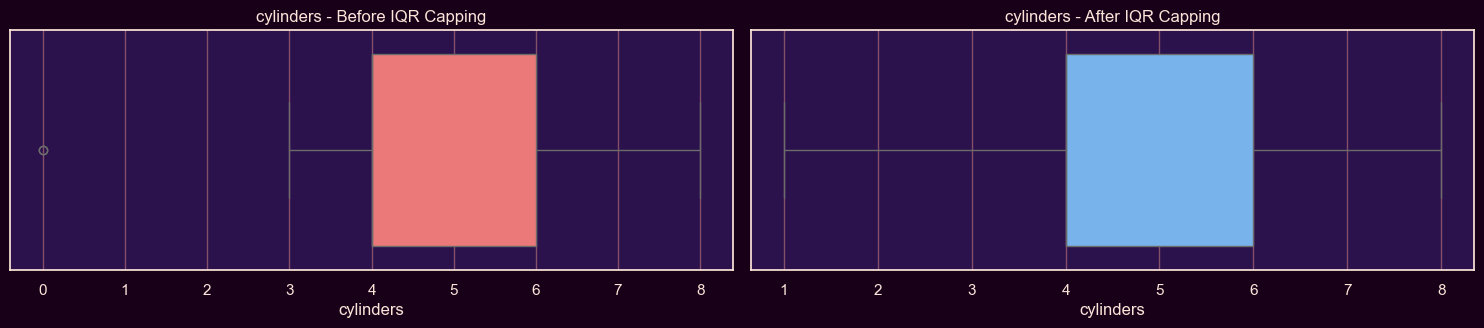

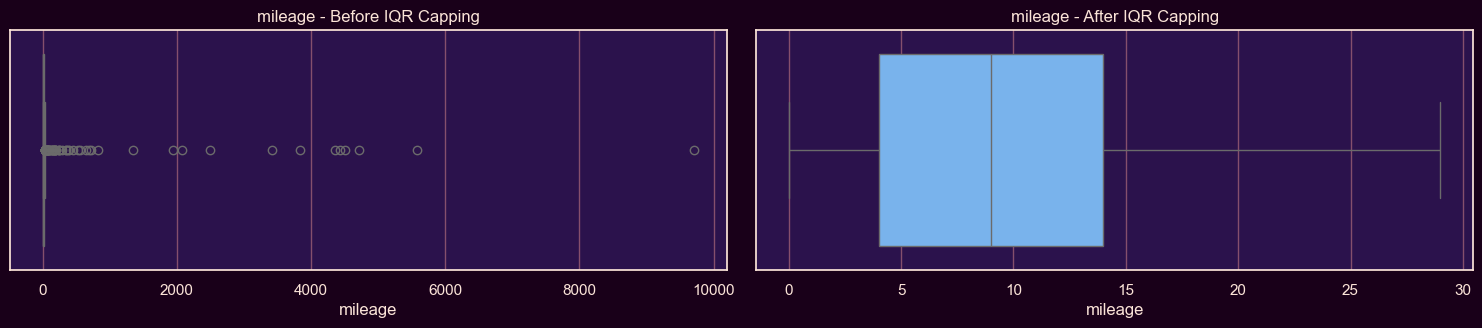

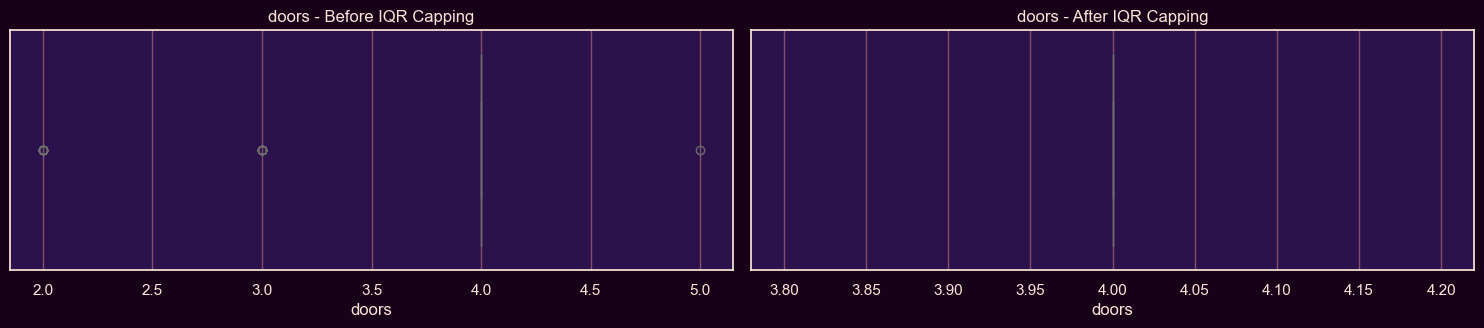

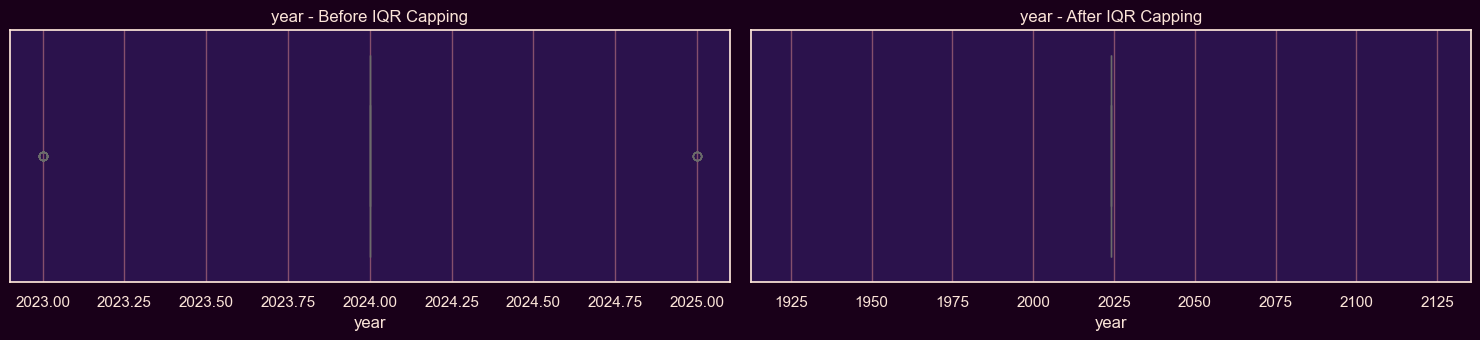

In [842]:
# Visualize the effect of IQR capping on outliers for each numerical column
plt.figure(figsize=(15, len(numerical_cols) * 3))  # Set overall figure size based on number of columns

for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(15, 15))  # Create a new figure for each column

    # Boxplot before IQR capping
    plt.subplot(len(numerical_cols), 2, 2*i + 1)
    sns.boxplot(x=df_before[col], color="#ff6666")
    plt.title(f'{col} - Before IQR Capping')

    # Boxplot after IQR capping
    plt.subplot(len(numerical_cols), 2, 2*i + 2)
    sns.boxplot(x=df[col], color="#66b3ff")
    plt.title(f'{col} - After IQR Capping')

    plt.tight_layout()  # Adjust subplot spacing for clarity

In [843]:
print("\nDescriptive statistics after outlier handling:")
display(df[numerical_cols].describe().round(2))


Descriptive statistics after outlier handling:


,price,cylinders,mileage,doors,year
count,978.00,978.00,978.00,978.0,978.0
mean,49758.18,4.86,10.55,4.0,2024.0
std,16815.15,1.33,9.11,0.0,0.0
min,4476.25,1.00,0.00,4.0,2024.0
25%,37101.25,4.00,4.00,4.0,2024.0
50%,47234.00,4.00,9.00,4.0,2024.0
75%,58851.25,6.00,14.00,4.0,2024.0
max,91476.25,8.00,29.00,4.0,2024.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

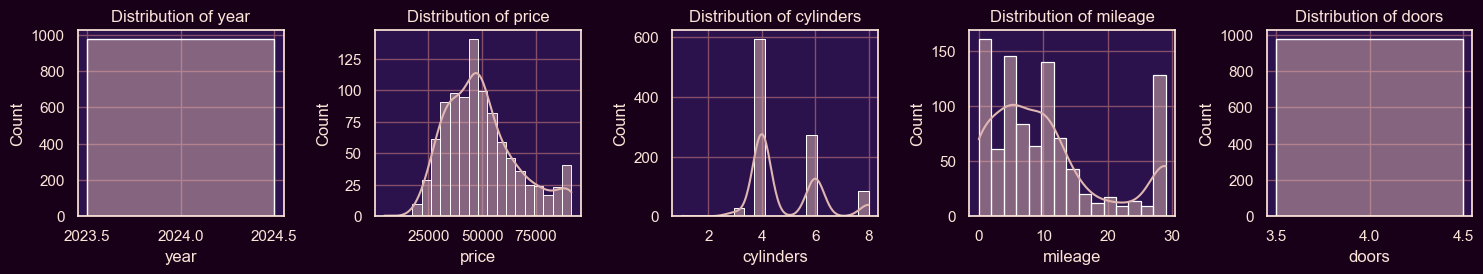

In [916]:
# Chart - 1 visualization code
# Visualize each numerical column
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))  # Set the overall figure size

# Loop through each continuous column and plot its distribution
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)  # Create a subplot for each variable
    sns.histplot(df[col], kde=True, color='#DFB6B2')  # Plot histogram with KDE for smoothness
    plt.title(f'Distribution of {col}')  # Set the title for each subplot

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()  # Display all the plots
    


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [845]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

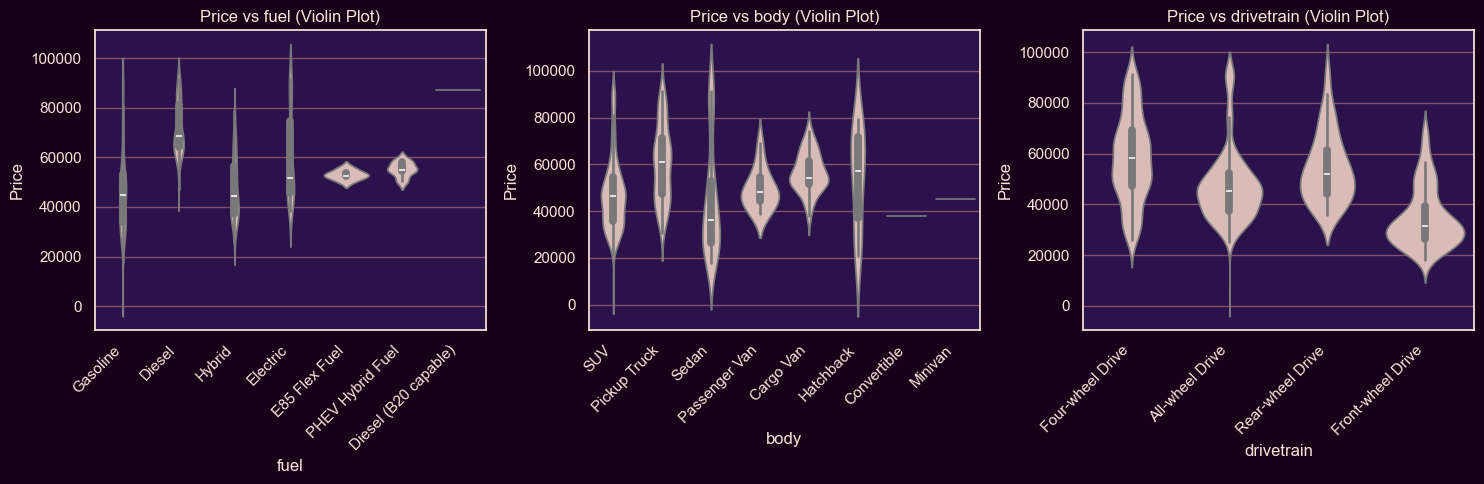

In [913]:
# Chart - 3 visualization code
categorical_cols_for_violin = ['fuel', 'body', 'drivetrain'] # Select relevant categorical columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols_for_violin):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(x=col, y='price', data=df, color='#DFB6B2')
    plt.title(f'Price vs {col} (Violin Plot)')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [847]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [848]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [849]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [850]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [851]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [852]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [853]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [854]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [855]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [856]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [857]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [858]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [859]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [860]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [861]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [862]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [863]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [864]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [865]:
# Expand Contraction

#### 2. Lower Casing

In [866]:
# Lower Casing

#### 3. Removing Punctuations

In [867]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [868]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [869]:
# Remove Stopwords

In [870]:
# Remove White spaces

#### 6. Rephrase Text

In [871]:
# Rephrase Text

#### 7. Tokenization

In [872]:
# Tokenization

#### 8. Text Normalization

In [873]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [874]:
# POS Taging

#### 10. Text Vectorization

In [875]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [876]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [877]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [878]:
# Transform Your data

### 6. Data Scaling

In [879]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [880]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [881]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [882]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [883]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [884]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [885]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [886]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [887]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [888]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [889]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [890]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [891]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [892]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***